<a href="https://colab.research.google.com/github/deepthi-naresh/Internship_projects/blob/main/Alfidotasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

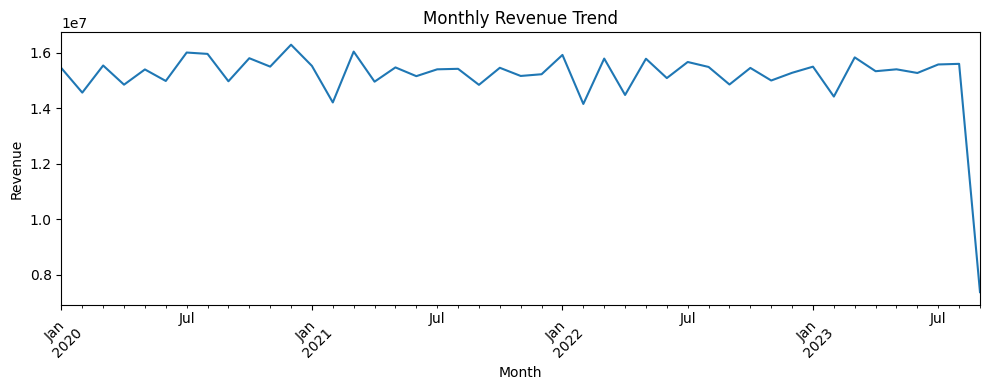

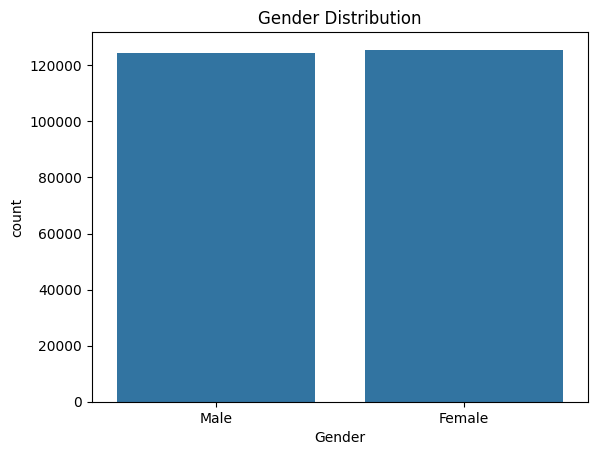

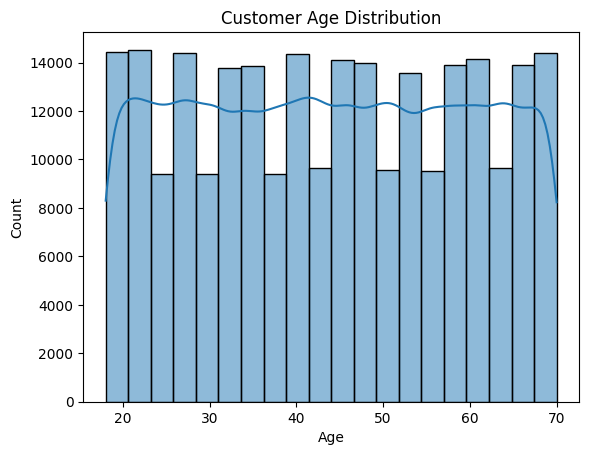

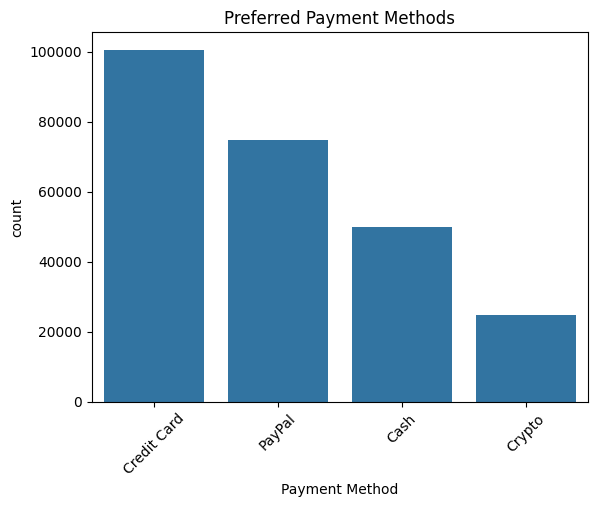

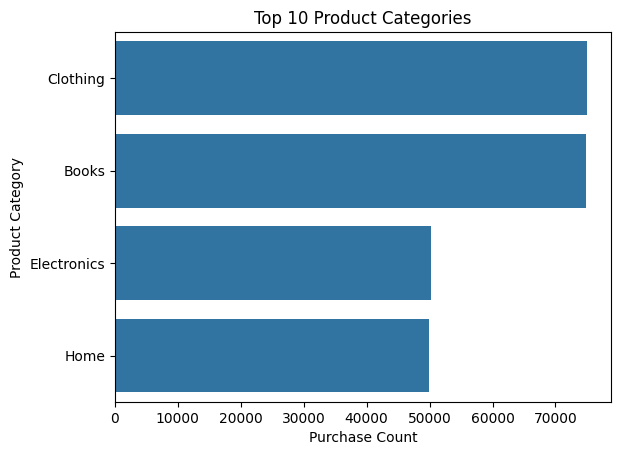

Return Rate (%):
 Returns
0.0    50.213929
1.0    49.786071
Name: proportion, dtype: float64


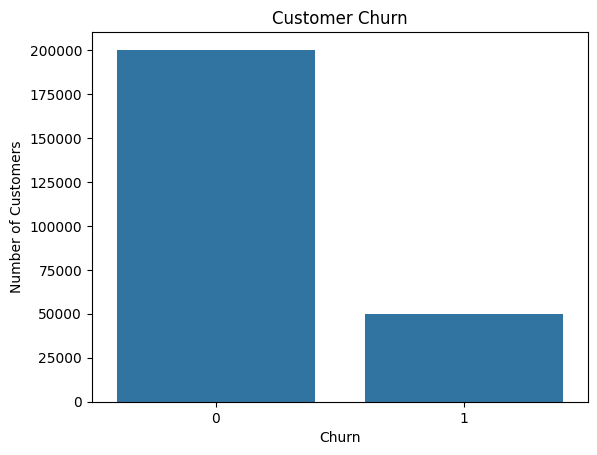


RFM Summary:
             Recency     Frequency      Monetary
count  49673.000000  49673.000000  49673.000000
mean     260.424979      5.032915  13716.559962
std      246.024001      2.206427   6840.208557
min        0.000000      1.000000    110.000000
25%       77.000000      3.000000   8719.000000
50%      184.000000      5.000000  13026.000000
75%      368.000000      6.000000  17966.000000
max     1352.000000     17.000000  55339.000000

High-value Customers: 4549


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

# --- Data Preprocessing ---
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df.dropna(subset=['Customer ID'], inplace=True)

# --- Basic Stats ---
print("Basic Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

# --- Revenue Trend Over Time ---
monthly_revenue = df.groupby('Month')['Total Purchase Amount'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', figsize=(10, 4))
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Gender Distribution ---
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# --- Age Distribution ---
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()

# --- Payment Method Analysis ---
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
plt.title('Preferred Payment Methods')
plt.xticks(rotation=45)
plt.show()

# --- Product Category Popularity ---
top_products = df['Product Category'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Purchase Count')
plt.show()

# --- Returns Analysis ---
return_rate = df['Returns'].value_counts(normalize=True) * 100
print("Return Rate (%):\n", return_rate)

# --- Churn Analysis ---
churn_counts = df['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# --- RFM Analysis ---
rfm = df.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (df['Purchase Date'].max() - x.max()).days,
    'Customer ID': 'count',
    'Total Purchase Amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print("\nRFM Summary:\n", rfm.describe())

# Segment customers by RFM (example: high value customers)
high_value = rfm[(rfm['Recency'] < 30) & (rfm['Frequency'] > 3) & (rfm['Monetary'] > 500)]
print(f"\nHigh-value Customers: {len(high_value)}")

# Optional: Export results
rfm.to_csv('rfm_results.csv')


Total Sales: $872,363.12
Total Orders: 1975


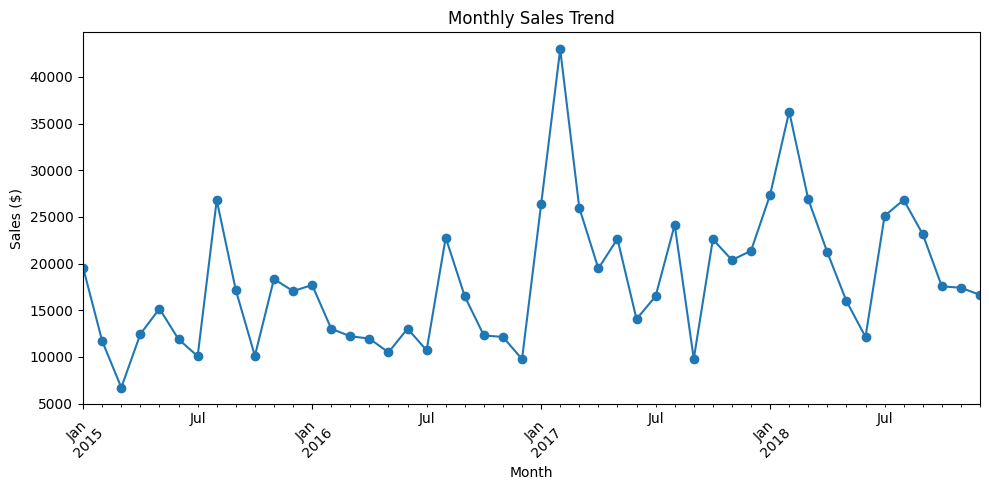

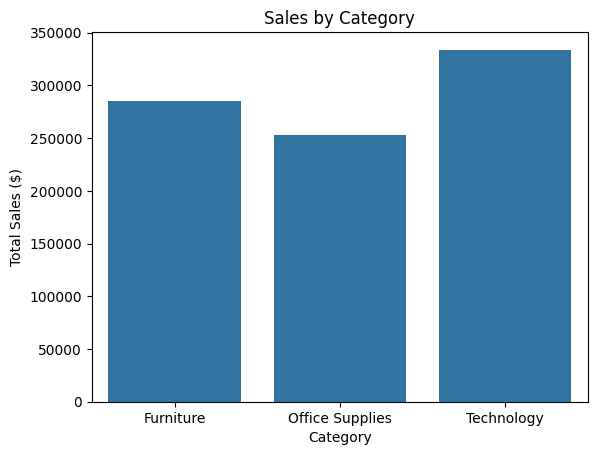

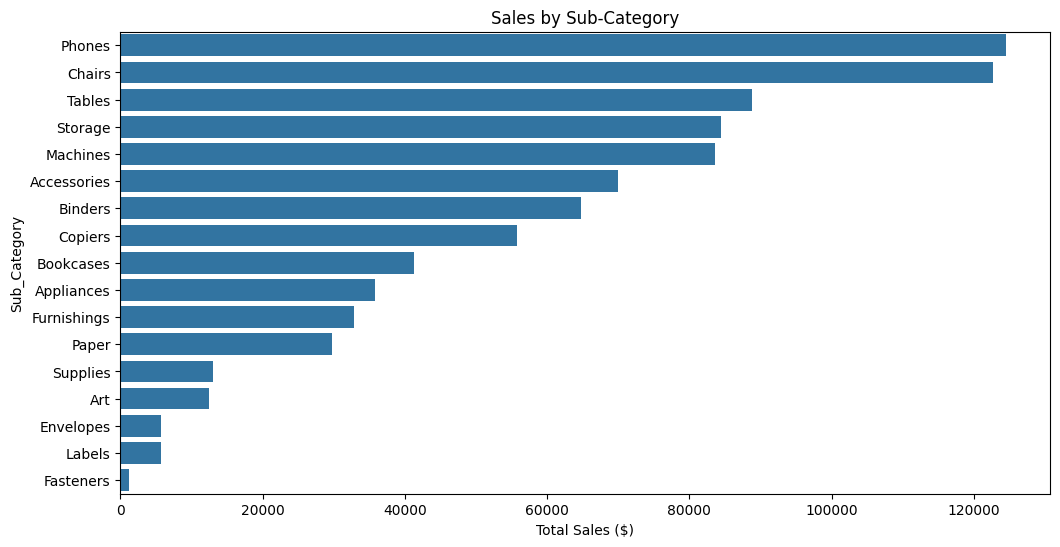

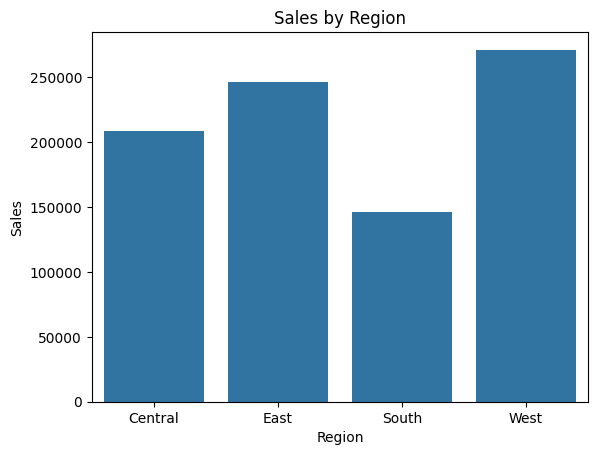

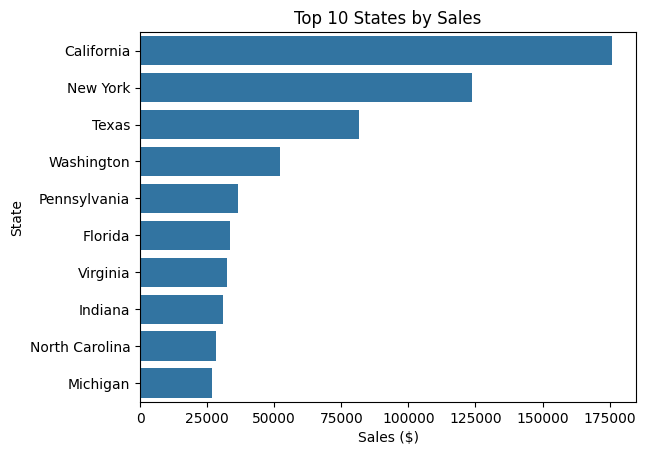

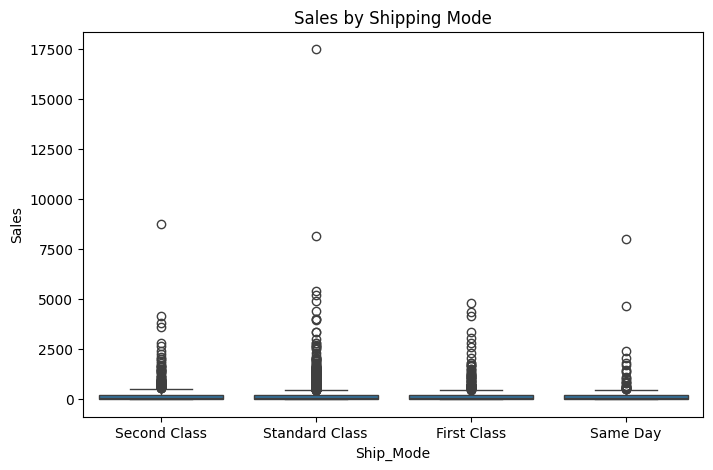

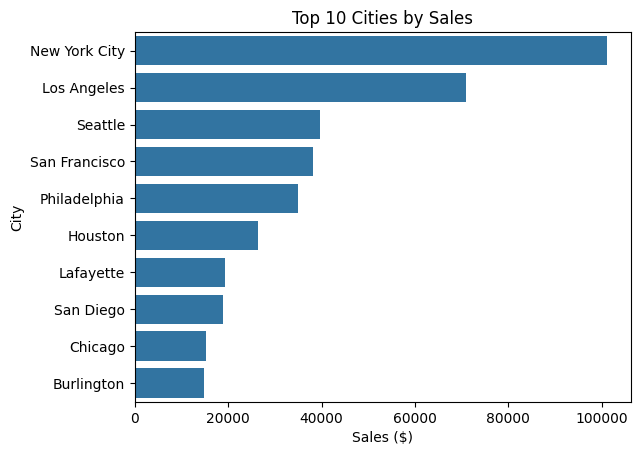

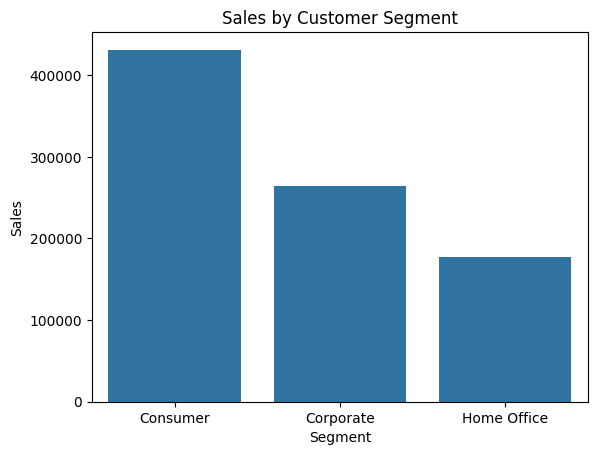

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the data ---
df = pd.read_csv('/content/superstore.csv',encoding='latin1')

# --- Clean column names (remove leading/trailing spaces) ---
df.columns = df.columns.str.strip().str.replace(" ", "_")

# --- Convert dates ---
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')
df['Month'] = df['Order_Date'].dt.to_period('M')

# --- Remove rows with missing sales or dates ---
df.dropna(subset=['Sales', 'Order_Date'], inplace=True)

# --- 1. Total Sales and Orders ---
print("Total Sales: ${:,.2f}".format(df['Sales'].sum()))
print("Total Orders:", df['Order_ID'].nunique())

# --- 2. Monthly Sales Trend ---
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5), title='Monthly Sales Trend', marker='o')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Sales by Category ---
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')
plt.title('Sales by Category')
plt.ylabel('Total Sales ($)')
plt.show()

# --- 4. Sales by Sub-Category ---
subcat_sales = df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index)
plt.title('Sales by Sub-Category')
plt.xlabel('Total Sales ($)')
plt.show()

# --- 5. Sales by Region ---
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.show()

# --- 6. Sales by Top States ---
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=state_sales.values, y=state_sales.index)
plt.title('Top 10 States by Sales')
plt.xlabel('Sales ($)')
plt.show()

# --- 7. Ship Mode Sales Distribution ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ship_Mode', y='Sales')
plt.title('Sales by Shipping Mode')
plt.show()

# --- 8. Top Cities by Sales ---
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales ($)')
plt.show()

# --- 9. Sales by Segment ---
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
sns.barplot(data=segment_sales, x='Segment', y='Sales')
plt.title('Sales by Customer Segment')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Figure size 1000x500 with 0 Axes>

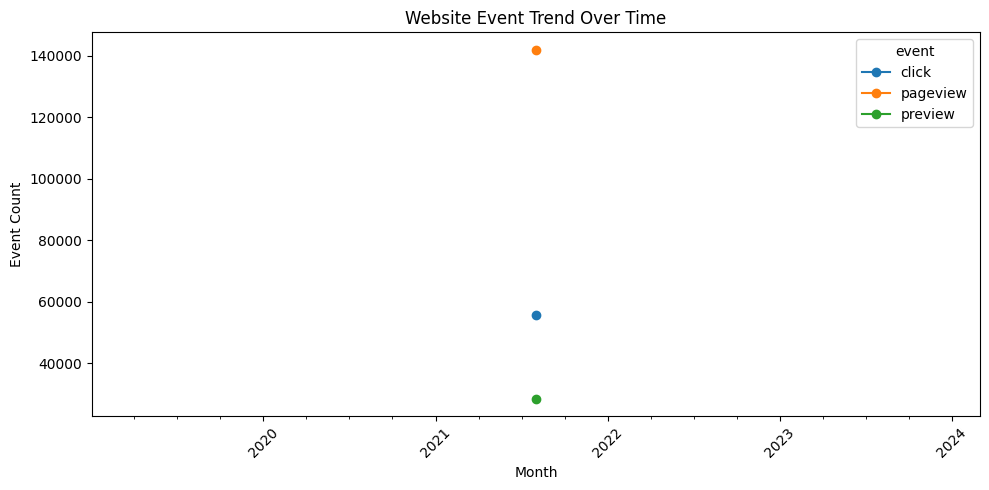

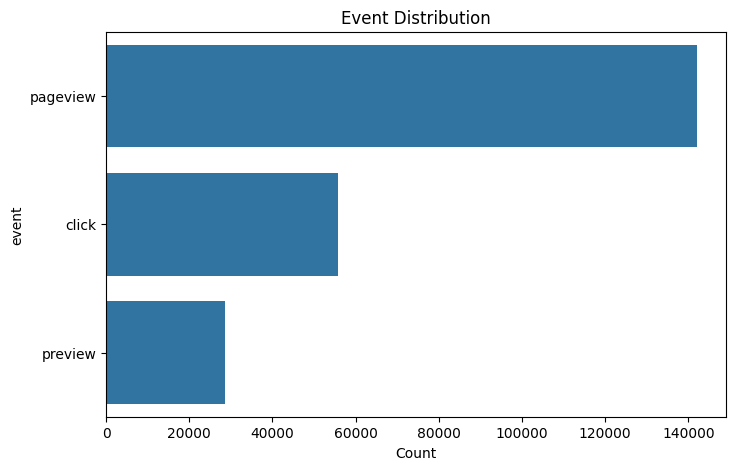

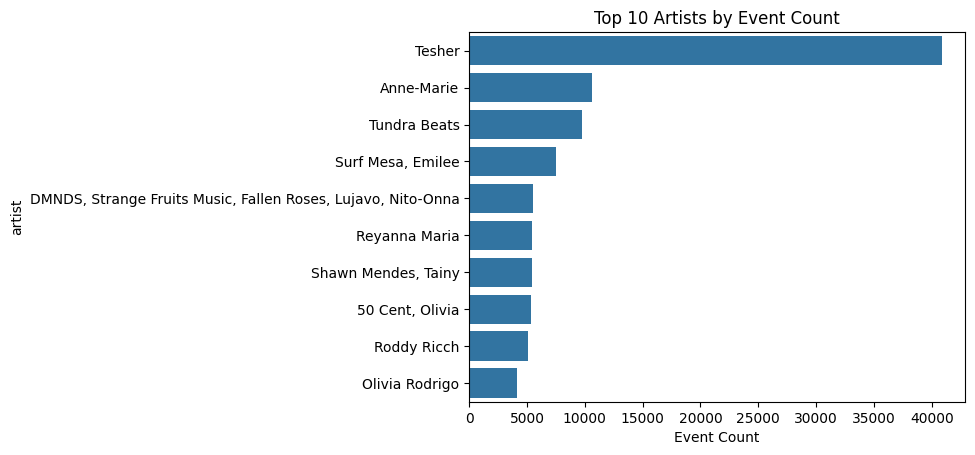

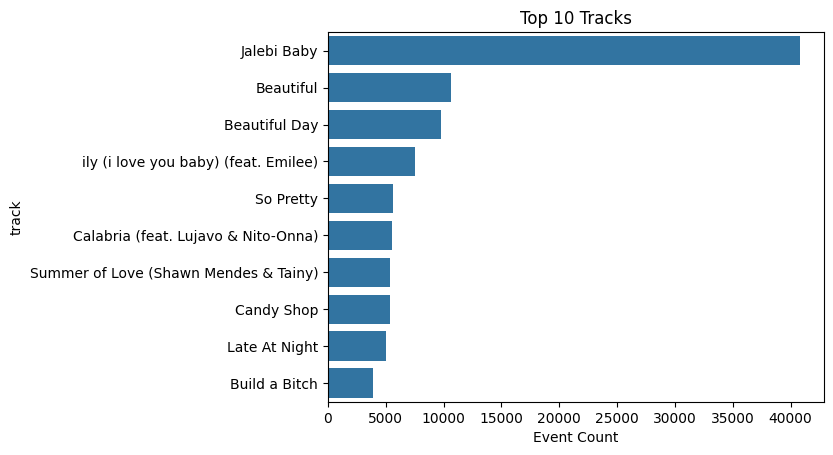

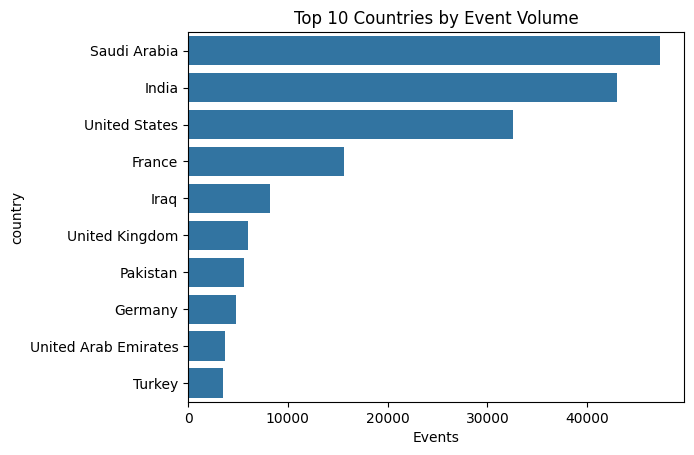

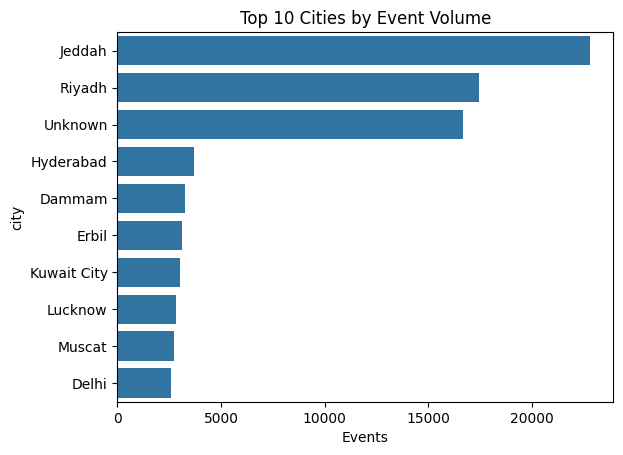

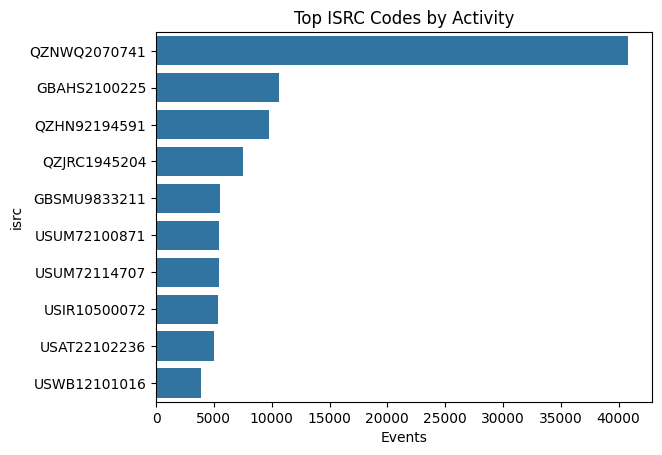

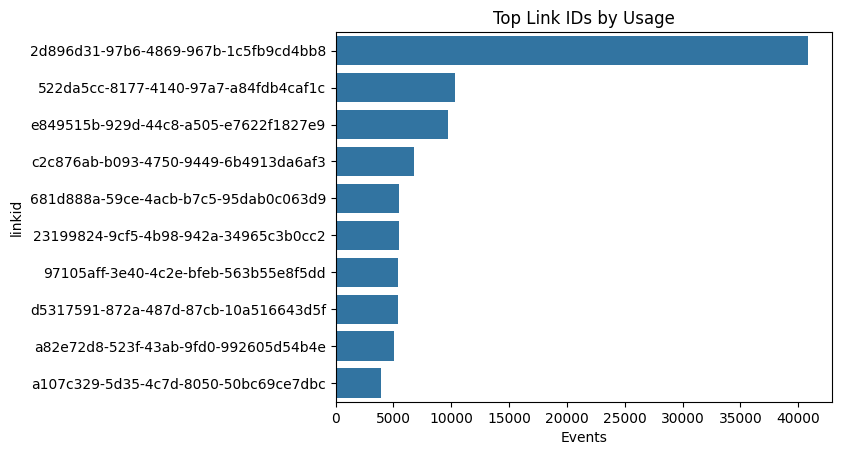

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/traffic.csv', encoding='utf-8')  # Change encoding if needed

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['Month'] = df['date'].dt.to_period('M')

# --- 1. Events Over Time ---
plt.figure(figsize=(10, 5))
event_trend = df.groupby(['Month', 'event']).size().unstack(fill_value=0)
event_trend.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Website Event Trend Over Time')
plt.ylabel('Event Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Top Events Overall ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='event', order=df['event'].value_counts().index)
plt.title('Event Distribution')
plt.xlabel('Count')
plt.show()

# --- 3. Top Artists ---
top_artists = df['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Event Count')
plt.xlabel('Event Count')
plt.show()

# --- 4. Top Tracks ---
top_tracks = df['track'].value_counts().head(10)
sns.barplot(x=top_tracks.values, y=top_tracks.index)
plt.title('Top 10 Tracks')
plt.xlabel('Event Count')
plt.show()

# --- 5. Country-wise Event Distribution ---
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Event Volume')
plt.xlabel('Events')
plt.show()

# --- 6. City-wise Event Distribution ---
city_counts = df['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by Event Volume')
plt.xlabel('Events')
plt.show()

# --- 7. ISRC Activity ---
isrc_counts = df['isrc'].value_counts().head(10)
sns.barplot(x=isrc_counts.values, y=isrc_counts.index)
plt.title('Top ISRC Codes by Activity')
plt.xlabel('Events')
plt.show()

# --- 8. LinkID Usage (if used to track campaigns or referrals) ---
link_counts = df['linkid'].value_counts().head(10)
sns.barplot(x=link_counts.values, y=link_counts.index)
plt.title('Top Link IDs by Usage')
plt.xlabel('Events')
plt.show()
